In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shareddrives/My\ paper

/content/drive/Shareddrives/My paper


In [ ]:
import math
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
data = pd.read_csv('./Customer Value Prediction/TABLES/Event Sequence.csv')

In [ ]:
PADDING_LENGTH = 60

In [ ]:
data.columns

Index(['MemberID', 'TotalSalesAmount', 'Active', 'VIP', 'bh', 'TimeDiff'], dtype='object')

In [ ]:
print(len(data['MemberID'].unique()), len(data))

83931 3449784


In [ ]:
data.describe()

,TotalSalesAmount,Active,VIP,TimeDiff
count,3.449784e+06,3.449784e+06,3.449784e+06,3.449784e+06
mean,1.405740e+03,3.001405e-01,1.655625e-01,7.072227e+03
std,4.251320e+03,4.583189e-01,3.716875e-01,4.046252e+04
min,-1.680000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.406000e+03,1.000000e+00,0.000000e+00,1.000000e+00
max,1.814280e+05,1.000000e+00,1.000000e+00,5.270230e+05


## 計算行為出現次數

In [ ]:
pd.DataFrame(data.groupby(by='bh').size(), columns=['個數'])

,個數
bh,
add,107318
checkout,73628
purchase,43960
register,9112
search,39897
traffic,670221
viewactivity,23417
viewcategory,713654
viewmainpage,851046


## 初始行為

In [ ]:
data['Member_pre'] = data['MemberID'].shift(periods=1, fill_value='First')
data['Member_next'] = data['MemberID'].shift(periods=-1, fill_value='Last')

In [ ]:
data['Order'] = ['MIDDLE'] * len(data)

for index, row in data.iterrows():
  if row['MemberID']!=row['Member_pre']:
    data.at[index, 'Order'] = 'FIRST'
  if row['MemberID']!=row['Member_next']:
    data.at[index, 'Order'] = 'LAST'

In [ ]:
pd.DataFrame(data[data['Order']=='FIRST'].groupby(by=['bh']).size())

,0
bh,
add,1302
checkout,653
purchase,287
register,92
search,453
traffic,20478
viewactivity,290
viewcategory,9058
viewmainpage,37775


## 行為次數

In [ ]:
pd.DataFrame(data.groupby(by=['MemberID']).size(), columns=['Events']).describe()

,Events
count,83931.000000
mean,41.102620
std,22.297833
min,1.000000
25%,18.000000
50%,59.000000
75%,60.000000
max,60.000000


In [ ]:
event_df = pd.DataFrame(data.groupby(by=['MemberID']).size(), columns=['Events'])

In [ ]:
label_df = data.drop_duplicates(subset=['MemberID'], keep='last')[['MemberID', 'TotalSalesAmount', 'Active', 'VIP']]

In [ ]:
event_df = pd.merge(event_df, label_df, on='MemberID', how='left')

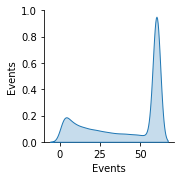

In [ ]:
sns.pairplot(event_df[['Events']], diag_kind='kde')

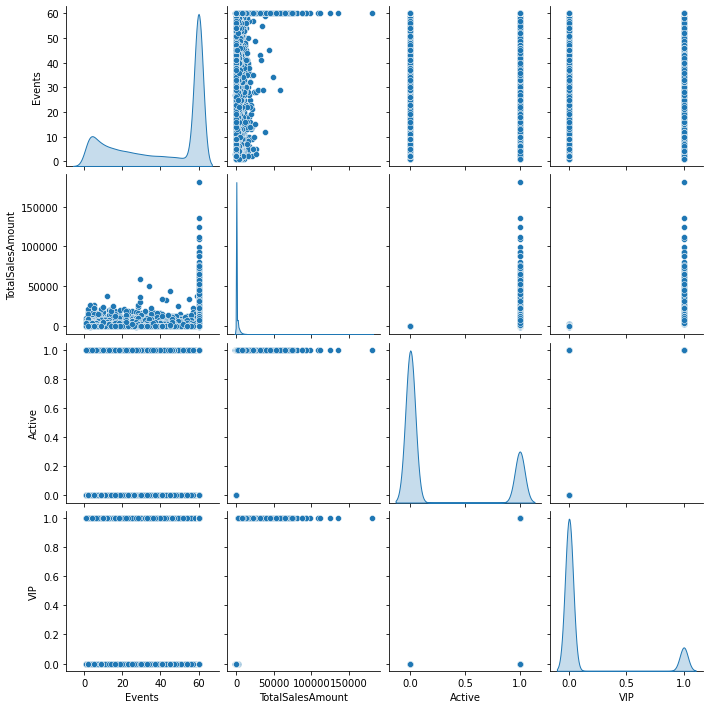

In [ ]:
sns.pairplot(event_df, diag_kind='kde')

In [ ]:
pd.DataFrame(event_df.groupby(by=['Events']).size(), columns=['Count'])

,Count
Events,
1,1165
2,2036
3,1950
4,1586
5,1407
6,1277
7,1250
8,1179
9,1124
